In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# tickers = ['ADANIPORTS.NS', 'TATAMOTORS.NS', 'AXISBANK.NS', 'COALINDIA.NS', 'HCLTECH.NS']

In [ ]:
# ticker = ['ADANIPORTS.NS']

In [ ]:
tickers = ['TECHM.NS', 'M&M.NS', 'WIPRO.NS', 'SBIN.NS', 'BAJFINANCE.NS',
    'INFY.NS', 'KOTAKBANK.NS', 'TRENT.NS', 'BAJAJFINSV.NS', 'SHRIRAMFIN.NS',
    'ADANIPORTS.NS', 'TATAMOTORS.NS', 'AXISBANK.NS', 'COALINDIA.NS', 'HCLTECH.NS',
    'BRITANNIA.NS', 'ICICIBANK.NS', 'LT.NS', 'CIPLA.NS', 'NTPC.NS',
    'BHARTIARTL.NS', 'NESTLEIND.NS', 'TATACONSUM.NS', 'HEROMOTOCO.NS', 'APOLLOHOSP.NS',
    'BEL.NS', 'HDFCBANK.NS', 'HINDALCO.NS', 'TCS.NS', 'SBILIFE.NS',
    'POWERGRID.NS', 'ULTRACEMCO.NS', 'ADANIENT.NS', 'HDFCLIFE.NS', 'GRASIM.NS',
    'ITC.NS', 'DRREDDY.NS', 'RELIANCE.NS', 'ONGC.NS', 'JSWSTEEL.NS',
    'EICHERMOT.NS', 'TITAN.NS', 'SUNPHARMA.NS', 'INDUSINDBK.NS', 'BPCL.NS',
    'MARUTI.NS', 'TATASTEEL.NS', 'BAJAJ-AUTO.NS', 'ASIANPAINT.NS', 'HINDUNILVR.NS']

In [ ]:
for ticker in tickers:
    lstm_data = pd.read_csv(f'/content/drive/MyDrive/Ph.D/Datasets/LSTM/comparison/{ticker}.csv')
    arima_data = pd.read_csv(f'/content/drive/MyDrive/Ph.D/Datasets/ARIMA/forecast_data/{ticker}.csv')

    lstm_data = lstm_data.rename(columns={'Predicted': 'LSTM Forecast'})
    arima_data = arima_data.rename(columns={'Predicted': 'ARIMA Forecast'})
    lstm_data = lstm_data.rename(columns={'Close':'Actual Price'})

    combined_data = pd.concat([lstm_data, arima_data['ARIMA Forecast']], axis=1)

    combined_data['Date'] = pd.to_datetime(combined_data['Date'])
    combined_data = combined_data.set_index('Date')

    scaler = MinMaxScaler()
    # Fit the scaler on all relevant columns
    combined_data[['Actual Price', 'LSTM Forecast', 'ARIMA Forecast']] = scaler.fit_transform(
        combined_data[['Actual Price', 'LSTM Forecast', 'ARIMA Forecast']]
    )

    #deducting the first element from each datapoint
    combined_data['Actual Price'] = combined_data['Actual Price'] - combined_data['Actual Price'].iloc[0]
    combined_data['LSTM Forecast'] = combined_data['LSTM Forecast'] - combined_data['LSTM Forecast'].iloc[0]
    combined_data['ARIMA Forecast'] = combined_data['ARIMA Forecast'] - combined_data['ARIMA Forecast'].iloc[0]

    sns.set_theme(style="whitegrid", rc={"grid.linestyle": "--", "axes.edgecolor": "0.2", "axes.linewidth": 0.8})

    # Create a color palette for stunning visuals
    palette = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # Blue, Orange, Green

    # Create the figure and plot
    plt.figure(figsize=(15, 7))
    sns.lineplot(data=combined_data[['Actual Price', 'LSTM Forecast', 'ARIMA Forecast']],
                linewidth=3, palette=palette)

    # Set a light yellow background for the plot area
    plt.gca().set_facecolor('#ffffff')

    # Add titles and labels with modern font and padding
    plt.title(f'Stock Price Forecast for {ticker}', fontsize=18, fontweight='bold', pad=20)
    plt.xlabel('Date', fontsize=14, labelpad=10)
    plt.ylabel('Price', fontsize=14, labelpad=10)

    # Customize legend
    plt.legend(loc='best', fontsize=12, frameon=False)

    # Add a grid with a minimalistic design
    plt.grid(True, which='major', linestyle='--', linewidth=0.5, color='gray')

    # Adjust the layout and display
    plt.tight_layout()
    plt.savefig(f'/content/drive/MyDrive/Ph.D/Datasets/lstm_arima_compare/{ticker}.png')
    plt.clf()
    plt.close()

    combined_data.to_csv(f'/content/drive/MyDrive/Ph.D/Datasets/lstm_arima_compare/{ticker}.csv')
    print(f'{ticker} is plotted')


TECHM.NS is plotted
M&M.NS is plotted
WIPRO.NS is plotted
SBIN.NS is plotted
BAJFINANCE.NS is plotted
INFY.NS is plotted
KOTAKBANK.NS is plotted
TRENT.NS is plotted
BAJAJFINSV.NS is plotted
SHRIRAMFIN.NS is plotted
ADANIPORTS.NS is plotted
TATAMOTORS.NS is plotted
AXISBANK.NS is plotted
COALINDIA.NS is plotted
HCLTECH.NS is plotted
BRITANNIA.NS is plotted
ICICIBANK.NS is plotted
LT.NS is plotted
CIPLA.NS is plotted
NTPC.NS is plotted
BHARTIARTL.NS is plotted
NESTLEIND.NS is plotted
TATACONSUM.NS is plotted
HEROMOTOCO.NS is plotted
APOLLOHOSP.NS is plotted
BEL.NS is plotted
HDFCBANK.NS is plotted
HINDALCO.NS is plotted
TCS.NS is plotted
SBILIFE.NS is plotted
POWERGRID.NS is plotted
ULTRACEMCO.NS is plotted
ADANIENT.NS is plotted
HDFCLIFE.NS is plotted
GRASIM.NS is plotted
ITC.NS is plotted
DRREDDY.NS is plotted
RELIANCE.NS is plotted
ONGC.NS is plotted
JSWSTEEL.NS is plotted
EICHERMOT.NS is plotted
TITAN.NS is plotted
SUNPHARMA.NS is plotted
INDUSINDBK.NS is plotted
BPCL.NS is plotted
M

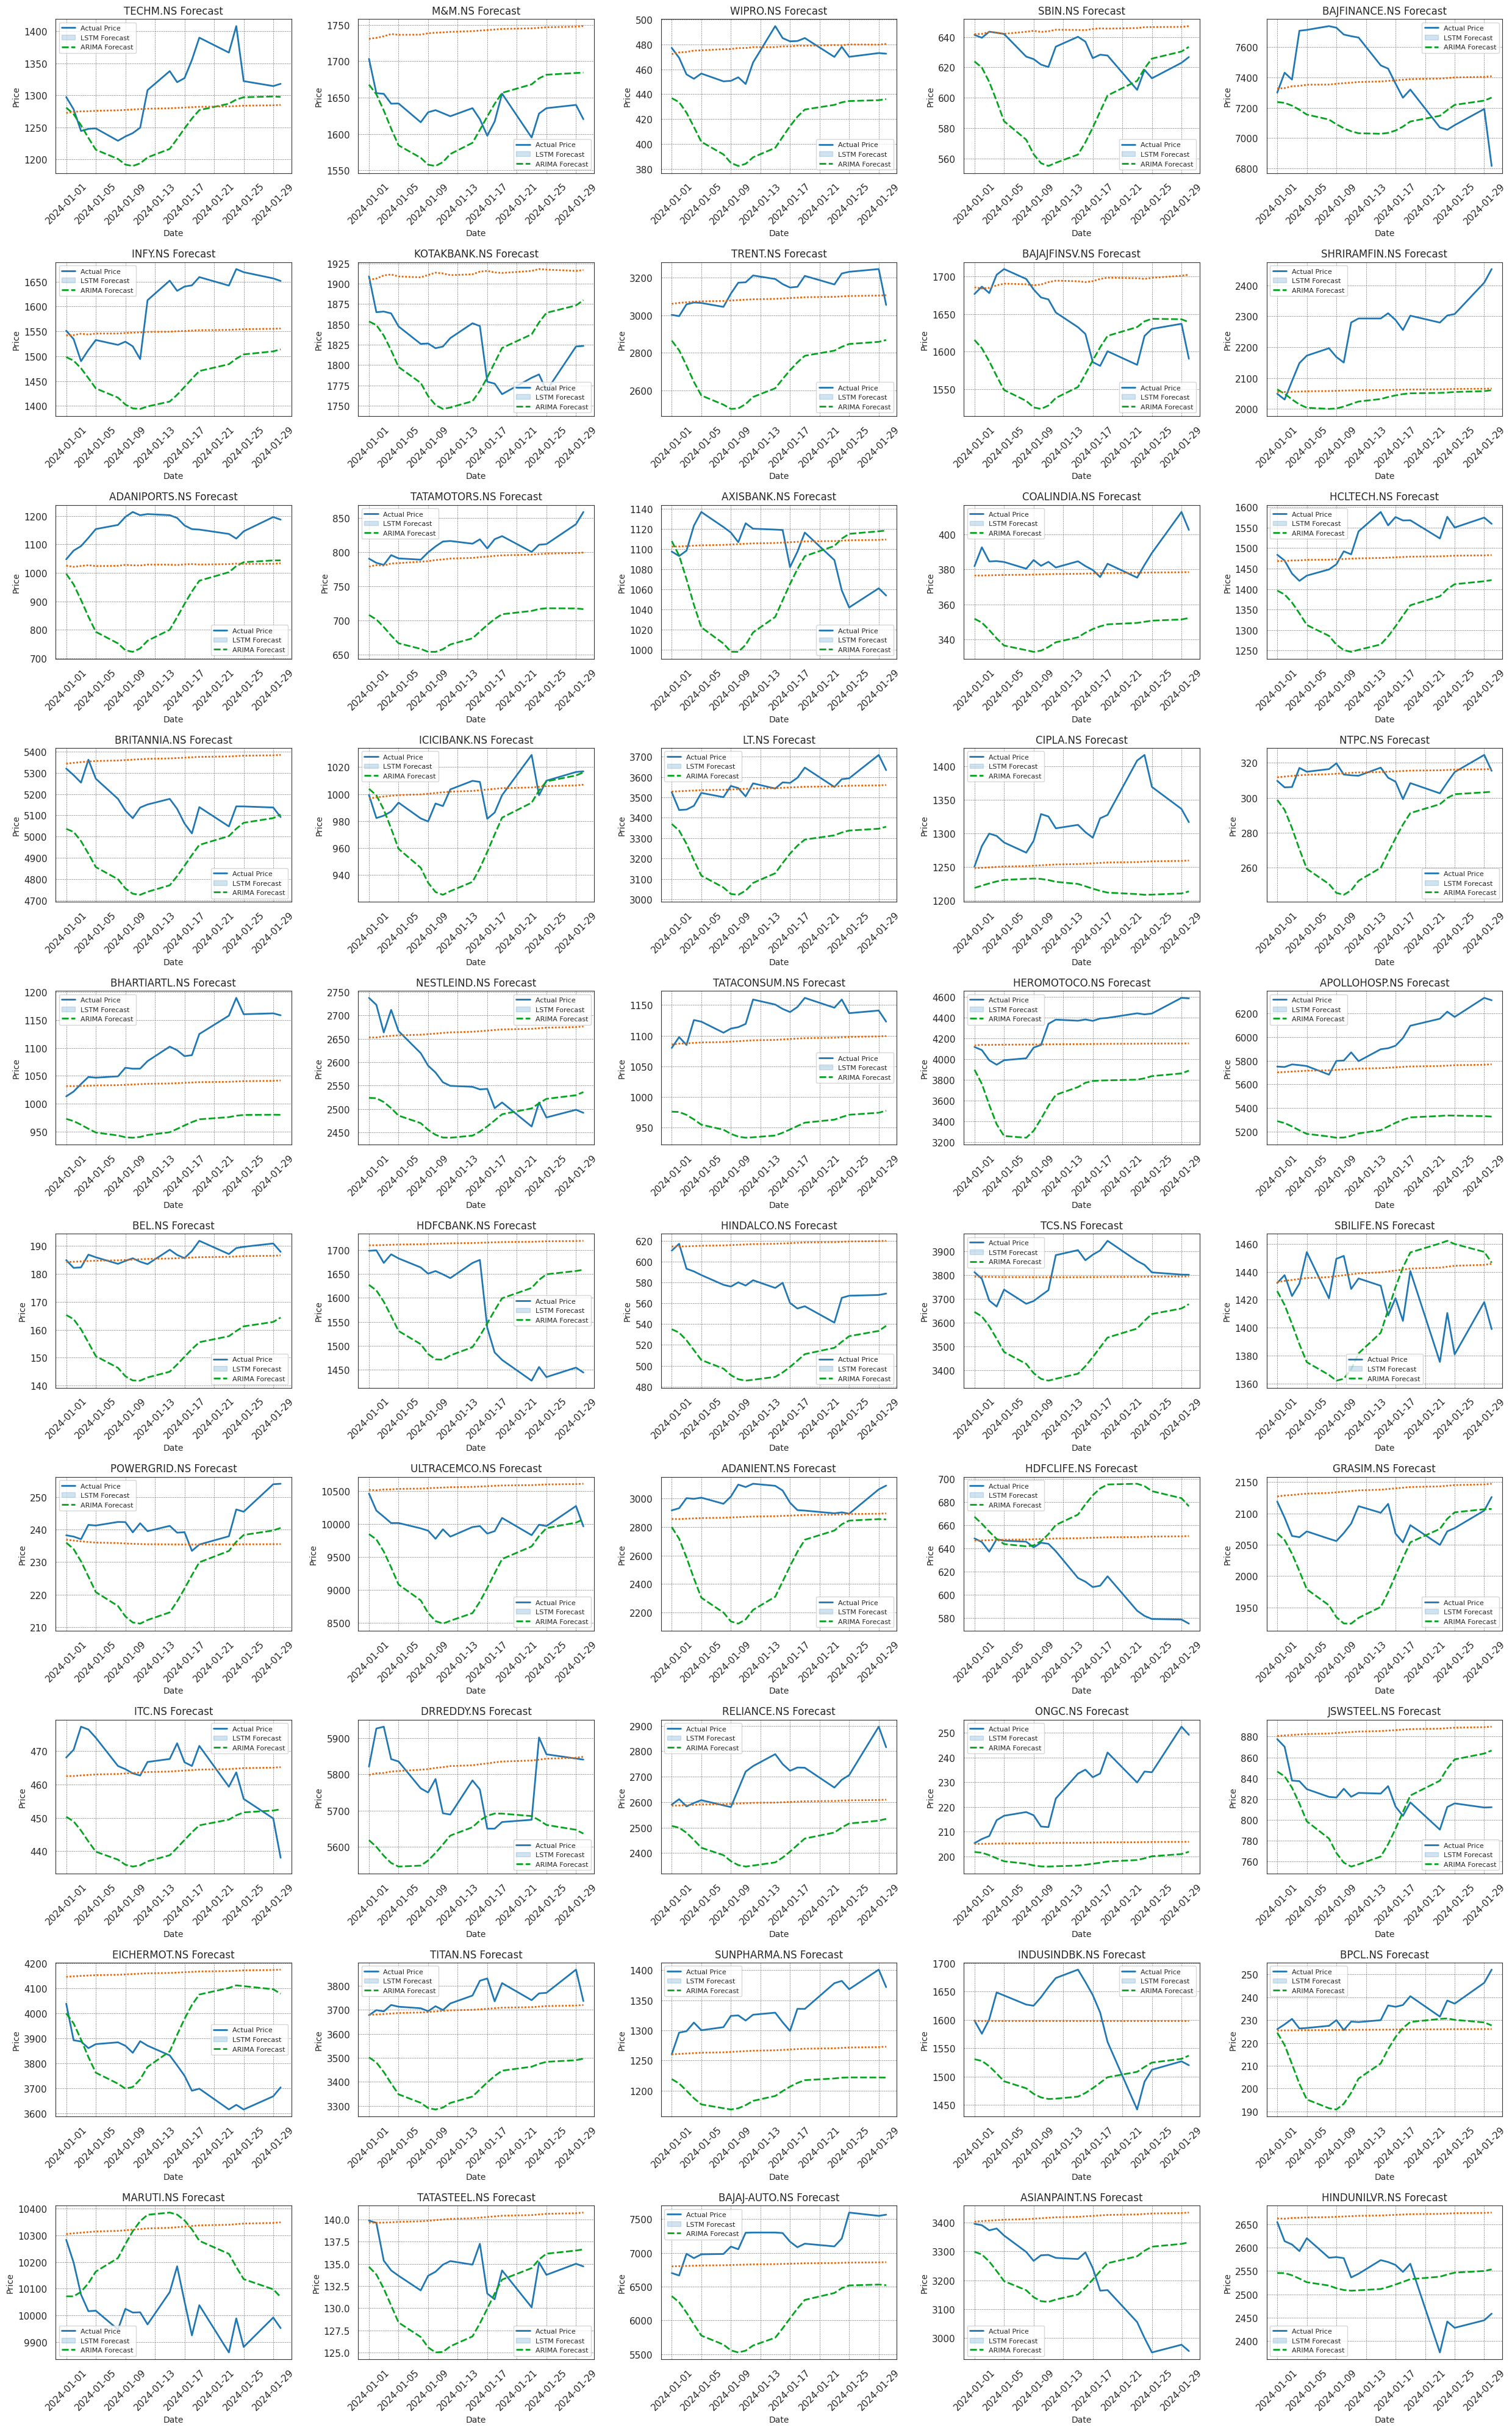

In [ ]:


# Set up the figure and subplots
fig, axes = plt.subplots(10, 5, figsize=(25, 40))  # 10 rows and 5 columns, adjust figsize as needed

for idx, ticker in enumerate(tickers):
    # Load the data for the given ticker
    lstm_data = pd.read_csv(f'/content/drive/MyDrive/Ph.D/Datasets/LSTM/comparison/{ticker}.csv')
    arima_data = pd.read_csv(f'/content/drive/MyDrive/Ph.D/Datasets/ARIMA/forecast_data/{ticker}.csv')

    # Rename columns and merge the necessary data
    lstm_data = lstm_data.rename(columns={'Close': 'Actual Price'})
    arima_data = arima_data.rename(columns={'Predicted': 'ARIMA Forecast'})

    combined_data = pd.concat([lstm_data, arima_data['ARIMA Forecast']], axis=1)
    combined_data['Date'] = pd.to_datetime(combined_data['Date'])
    combined_data = combined_data.set_index('Date')

    # Determine subplot location
    row_idx = idx // 5  # 5 columns per row
    col_idx = idx % 5

    # Plot only Actual Price and ARIMA Forecast
    sns.lineplot(ax=axes[row_idx, col_idx], data=combined_data[['Actual Price', 'Predicted','ARIMA Forecast']],
                 linewidth=2, palette=["#1f77b4", "#04a41f",'#e56506'])  # Blue and Green palette

    # Set titles and labels
    axes[row_idx, col_idx].set_title(f'{ticker} Forecast', fontsize=12)
    axes[row_idx, col_idx].set_xlabel('Date', fontsize=10)
    axes[row_idx, col_idx].set_ylabel('Price', fontsize=10)
    axes[row_idx, col_idx].legend(['Actual Price', 'LSTM Forecast','ARIMA Forecast'], loc='best', fontsize=8)
    axes[row_idx, col_idx].grid(True, which='major', linestyle='--', linewidth=0.5, color='gray')

    # axes[row_idx, col_idx].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: pd.to_datetime(x).strftime('%b %Y')))
    axes[row_idx, col_idx].tick_params(axis='x', rotation=45)  # Rotate date labels for better visibility
    # print(f'{ticker}is done')

# Adjust the layout for better spacing
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Ph.D/Datasets/lstm_arima_compare/combined_plots.png')
plt.show()


In [ ]:
combined_data


,Actual Price,Predicted,ARIMA Forecast
Date,,,
2024-01-01,2654.750000,2545.7231,2662.413567
2024-01-02,2613.800049,2545.3667,2661.887265
2024-01-03,2606.550049,2540.7239,2663.336748
2024-01-04,2592.550049,2533.5980,2663.777384
2024-01-05,2620.050049,2525.8580,2664.540372
2024-01-08,2578.250000,2518.7153,2665.229570
2024-01-09,2579.750000,2512.9563,2665.928586
2024-01-10,2577.399902,2509.2283,2666.628687
2024-01-11,2536.199951,2507.7378,2667.327517
